#01. Data Exploration
### I. Team-Members: 
- Felix Gaber, 20221385@novaims.unl.pt
- Felix Gayer, 20220320@novaims.unl.pt
- David Halder, 20220632@novaims.unl.pt
- Lukas Stark, 20220626@novaims.unl.pt
- Rita Soares, 20220616@novaims.unl.pt

### II. Link to the Dataset:
https://drive.google.com/drive/folders/1D8Hd49L0OLlSz2oCuuctfCKDcR8HK_c4?usp=share_link


### III. Summary of the notebook: 
This notebook has the purpose of data exploration. Before the analysis and the modelling, the data is explored to answer first questions, assess the quality of the data and to identify possible tasks for the data pre-processing.

The steps taken are the following: First, the data is imported. Next the key data, like the test-train split and the number of pictures are explored. Moreover, the distribution across classes in both sets is analysed to assess if there is a need for over/under sampling. It was concluded that the training set is not unbalanced, thus there is no need to balance it. However, there is an inbalance in the test set which proabably will have implications on the performance in terms of classification of the test data. However, since the Test-Set is used to evaluate the model and to represent the reality modifying it can lead to overestimating the model's performance. Other measures, like altering the weights in the model to incorporate the inbalance will be explored.

Next, a visual inspection of the used images is conducted. The motive behind this, is to get familiar with the images provided, check for any anomalies within the data and to assess the RGB-channels of the images. For the last point the pixel intensity was plotted as well. It can be concluded that no anomalies could be found. However, data augmentation might be needed since the "cracks" in the tires are not always visible to the same degree. In the next step, the dataset is searched for greyscaled images. The analysis concluded that there are greyscaled image but only a small percentage, thus the it still can make sense to use colored images for training purposes, even though it is less efficient. 

Finally, the sizes and the file format of the images was checked. Since there is only one file format, no additional changes are needed to import the data. However, there are more than 700 different sizes, which means that there will be a need for resizing before using the images for classification purposes.


# References

1. Siegel, Joshua (2021): Oxidized and non-oxidized tire sidewall and tread images

**Mount Personal GDrive**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Access**
1. Create shortcut to shared folder '**03 Project**'
2. Create new folder on personal GDrive called '**DeepLearningProject**' and click on 'ADD SHORTCUT'
3. Check if following path is available '**/content/drive/MyDrive/DeepLearningProject/03 Project**'

In [7]:
%cd '/content/drive/MyDrive/DeepLearningProject/03 Project'

/content/drive/.shortcut-targets-by-id/1_93ad1t8CGrSTc3bgngEEjuCVXLB6eHY/03 Project


---
# 1.1 Imports

First, all the libraries needed for data exploration are imported.

In [8]:
import os
import random
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
import tensorflow as tf

import cv2
import hashlib

-----
# 1.2 Analysis of the Key-data of the Dataset and distribution across classes

The dataset used is retrieved from the "Harvard Dataverse" and was used by Joshua Siegel for the paper "Automotive Diagnostics as a Service: An Artificially Intelligent Mobile Application for Tire Condition Assessment". (Siegel, 2021)

The images in the dataset are labeled, not augmented and are already split into a test and a training set. The images show normal and cracked tires, which are also the two classes available.

To get a clear undestanding of the dataset, it is imported and the proportions are displayed per class.

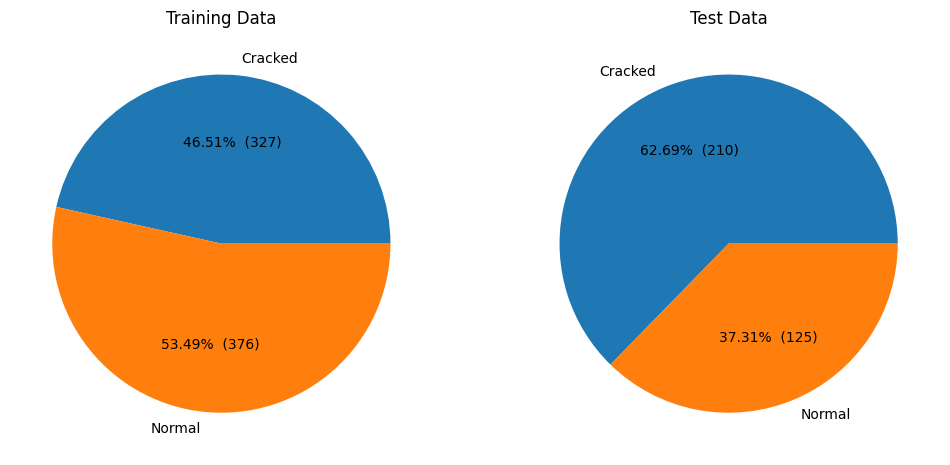

In [9]:
# Set path to dataset
path = "Data/Tire Textures"

# Set subfolders
subfolders = ["training_data", "testing_data"]

# Create empty lists to store counts
cracked_counts = []
normal_counts = []

# Iterate over subfolders
for subfolder in subfolders:
    # Get list of image files in cracked subfolder
    cracked_files = os.listdir(os.path.join(path, subfolder, "cracked"))
    cracked_count = len(cracked_files)
    cracked_counts.append(cracked_count)
    # Get list of image files in normal subfolder
    normal_files = os.listdir(os.path.join(path, subfolder, "normal"))
    normal_count = len(normal_files)
    normal_counts.append(normal_count)

# Create labels for the pie chart
labels = ['Cracked', 'Normal']

# Create data for the pie chart
training_data = cracked_counts[0], normal_counts[0]
test_data = cracked_counts[1], normal_counts[1]


# Create figure and axes objects
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

# Plot pie chart for training data
ax[0].pie(training_data, labels=labels, autopct=make_autopct(training_data))
ax[0].set_title('Training Data')

# Plot pie chart for test data
ax[1].pie(test_data, labels=labels, autopct=make_autopct(test_data))
ax[1].set_title('Test Data')

# Display the pie chart
plt.show()


Overall there are **537** pictures of **"Cracked"** and **501** pictures of **"Normal"** tires, which adds up to a dataset of **1.038** pictures.**32% (335)** are in the Test-Set and **68% (703)** pictures can be used for the training of the model. It can be seen that that there is a small inbalance in the training set, which is not significant enough to justify balancing the data via over- or undersampling. However, there is a bigger imbalance towards "Cracked" tires in the Test-set. However, no modifications are done with the testing-data, in order not to falsify the results of the experiment.

---
# 1.3 Display images & check pixel intensity

Next, a visual inspection of the images follows. It is important to inspect as many images as possible, to detect defect files and to get a deep understanding of the data used. To do so, it is randomly iterated through the pictures available and 5 pictures of the respective class are inspected simultaneously. 


In [ ]:
def PixelIntensityPlot(subfolder, prev_images):

  #subplot definition
  fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(10, 5))

  for i, image in enumerate(prev_images):
    
    img = cv2.imread(os.path.join(path, subfolder, prev_images[i]))

    #spliting the image in the 3 channels, red, blue and green
    b, g, r = cv2.split(img)

    #for each channel calculating the frequency of each intensity 
    hist_blue = cv2.calcHist(b,[0],None,[256],[0,256])
    hist_green = cv2.calcHist(g,[1],None,[256],[0,256])
    hist_red = cv2.calcHist(r,[2],None,[256],[0,256])

    #building the plots
    axs[i, 0].plot(hist_red, color='red')
    axs[i, 1].plot(hist_green, color='green')
    axs[i, 2].plot(hist_blue, color='blue')

  fig.suptitle('Pixel Intensity Distribution For ' + subfolder + ' Tires')
  plt.show()

['Normal (387).jpg', 'NewNormal148.jpg', 'Normal (270).jpg', 'Normal (319).jpg', 'Normal (291).jpg']
['Untitled-364.jpg', 'Cracked-237.jpg', 'Cracked-56.jpg', 'Untitled-397.jpg', 'Cracked-265.jpg']


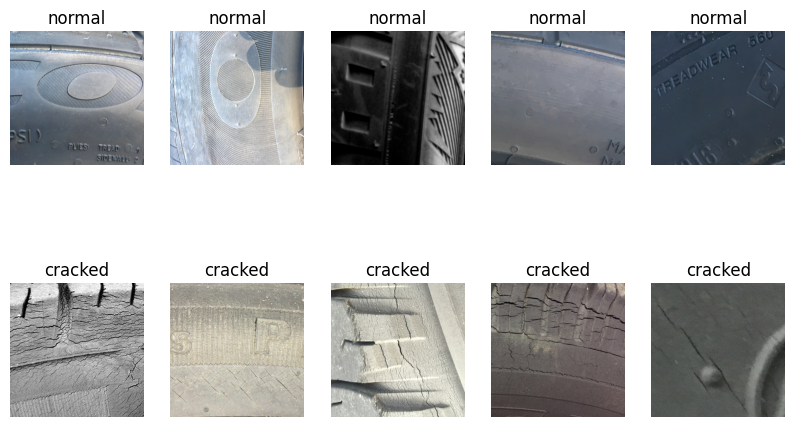

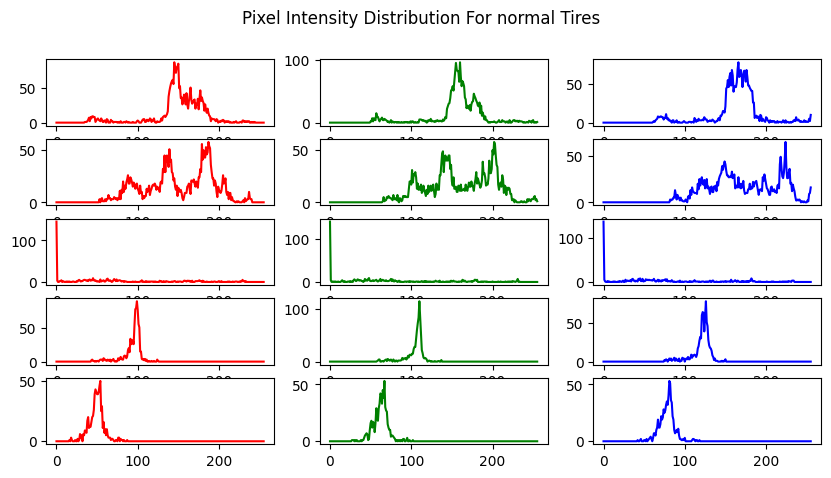

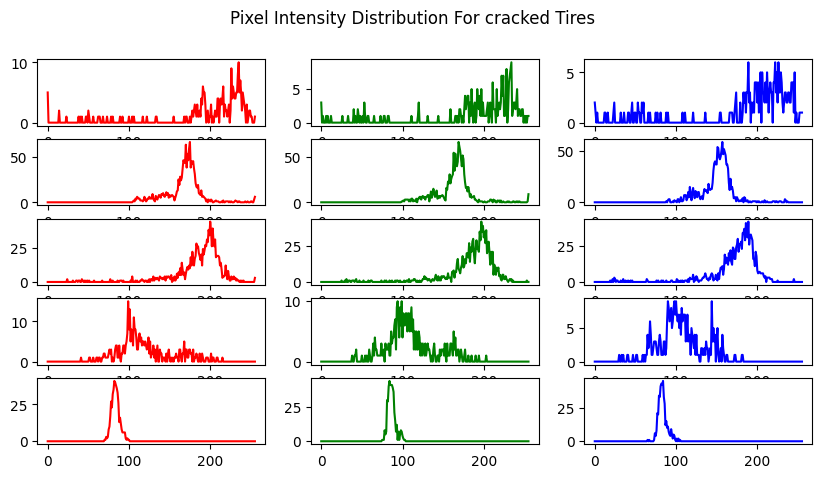

In [ ]:
# Set path to dataset
path = "Data/Tire Textures/training_data"

# Set subfolders
subfolders = ["normal", "cracked"]

# Create subplot
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10, 6))

# Iterate over subfolders
for i, subfolder in enumerate(subfolders):
    # Get list of image files
    image_files = os.listdir(os.path.join(path, subfolder))
    # random shuffle
    random.shuffle(image_files)
    # Select first 5 images
    selected_images = image_files[:5]
    print(selected_images)
    # Iterate over selected images
    if subfolder == "normal":
      normal_images = selected_images
    for j, image in enumerate(selected_images):
        # Load image
        img = plt.imread(os.path.join(path, subfolder, image))
        # Plot image
        axs[i,j].imshow(img)
        axs[i,j].set_title(subfolder)
        # Hide axis
        axs[i,j].axis('off')
        
# Show plot
plt.show()
PixelIntensityPlot('normal', normal_images)
PixelIntensityPlot('cracked', selected_images)

The visual inspection concludes: 
- No defective image data could be found
- No augmented images could be found
- The intensity of the damage of the "cracked" tires varies heavily. This could pose a challenge for the classification. The cracks could be amplified with image augmentation.
- The pixel intensity also varies heavily between the images. Thus in the next step the test and training set are checked for greyscaled images


# 1.4 Number of greyscale pictures

To assess if it makes sense to use RGB colored pictures for training purposes, the dataset is searched for greyscaled images. If there is a large percentage of greyscaled images, it might not make sense to use colored images from an efficiency perspective. 

To do so, a function was written to iterate through the dataset to use the method ``get_colors`` on every image. For the default values of this function, every colored picture, returns None. This will be done for the training and the test set.

## 1.4.1 Function

In [ ]:
def grey_images(img_path):
  grey_list = []
  subfolder_test = ["normal/", "cracked/"]
  for i, subfolder in enumerate(subfolder_test):
      # Get list of image files
      image_files = os.listdir(os.path.join(path, subfolder))
      for j, image in enumerate(image_files):
        file= path+subfolder_test[i]+image
        img = Image.open(file).convert('RGB')
        color_count = img.getcolors()
        if color_count != None: 
          grey_list.append(file)

## 1.4.2 Analysis of the Training-Set

In [ ]:
path = "Data/Tire Textures/training_data/"
def grey_images(img_path):
  grey_list = []
  subfolder_test = ["normal/", "cracked/"]
  for i, subfolder in enumerate(subfolder_test):
      # Get list of image files
      image_files = os.listdir(os.path.join(path, subfolder))
      for j, image in enumerate(image_files):
        file= path+subfolder_test[i]+image
        img = Image.open(file).convert('RGB')
        color_count = img.getcolors()
        if color_count != None: 
          grey_list.append(file)
  return grey_list

grey_list = grey_images(path)
print("Number of greyscale images in the training set", len(grey_list))

Number of greyscale images in the training set 25


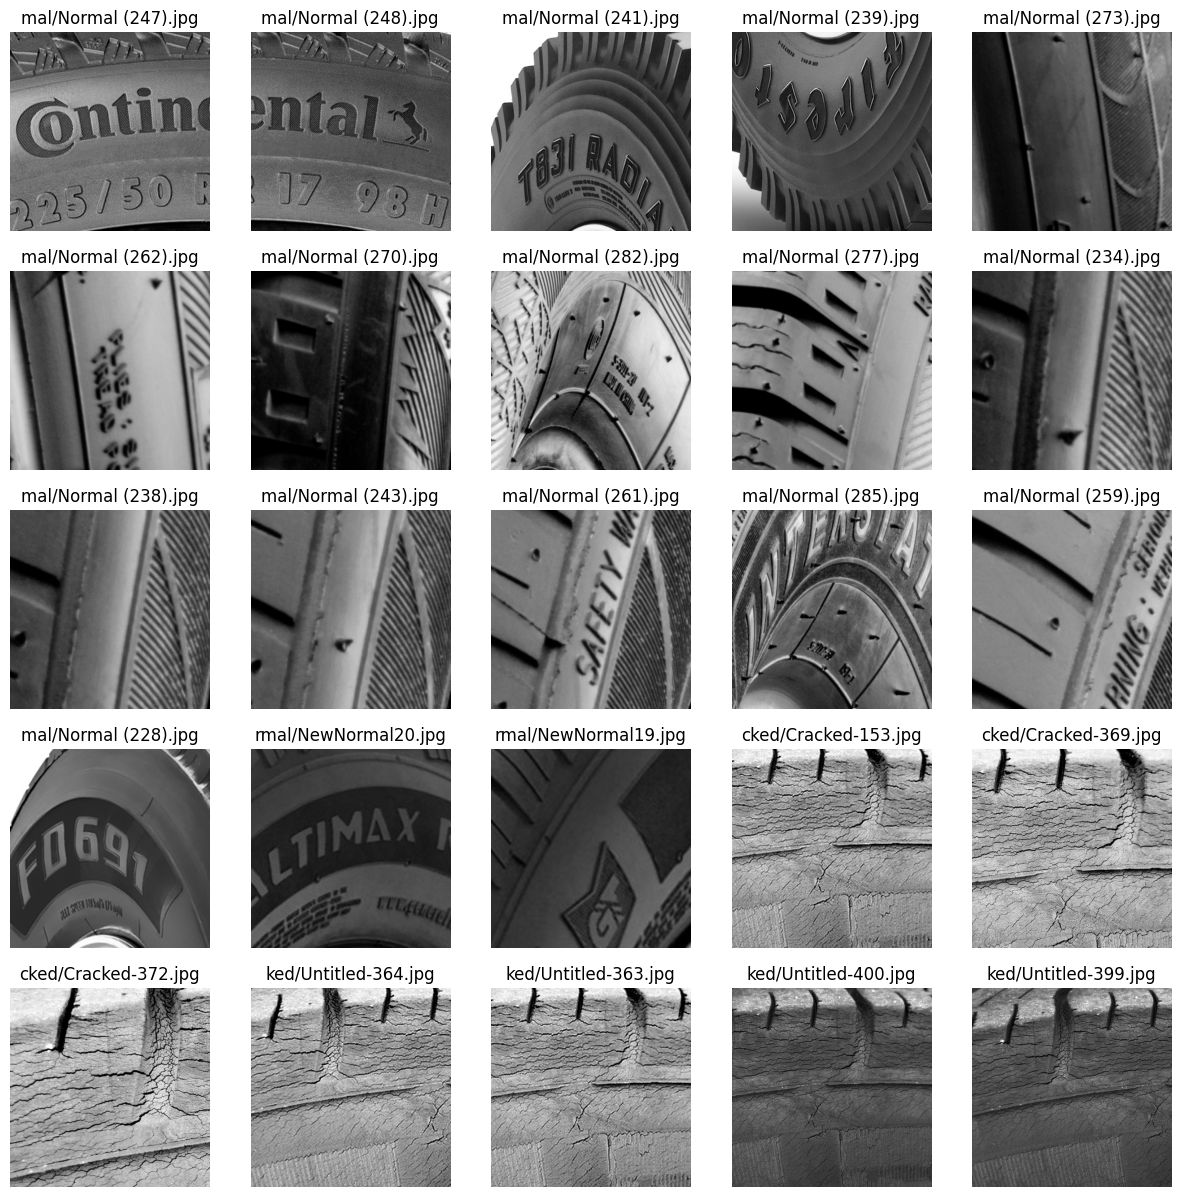

In [ ]:

fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))

for i, image in enumerate(grey_list[:25]):
    img = plt.imread(image)
    row = i // 5
    col = i % 5
    axs[row, col].set_title(image[-20:])
    axs[row, col].imshow(img, cmap='gray')
    axs[row, col].axis('off')

plt.show()

## 1.4.3 Analysis of the Testing-Set

In [ ]:
path = "Data/Tire Textures/testing_data/"

grey_list_test = grey_images(path)
print("Number of greyscale images in the test set", len(grey_list_test))

Number of greyscale images in the test set 2


It can be concluded that the grey images, are too less in number *(Training: 25, Testing: 2)* that it would justify not using the RGB channels.


# 1.4 File Type & Image Size
Finally, the different sizes of the images are reviewed, to obtain the maximum size which can be used and to see if resizing or even artificial image magnification is needed. This could prove useful for the classification task, especially since the visual inspection showed that the damages are not always visible to the same degree.

Furthermore, it is checked if the dataset contains multiple file-types, which could have implications on the importing- and preprocessing-steps.

In [ ]:
# Set path to dataset
path = "Data/Tire Textures"

# Set subfolders
subfolders = ["training_data", "testing_data"]

# Create empty sets to store unique sizes and formats
unique_sizes = set()
unique_formats = set()

# Iterate over subfolders
for subfolder in subfolders:
    # Set sub-subfolders
    sub_subfolders = ["cracked", "normal"]
    # Iterate over sub-subfolders
    for sub_subfolder in sub_subfolders:
        # Get list of image files
        image_files = os.listdir(os.path.join(path, subfolder, sub_subfolder))
        # Iterate over image files
        for image_file in image_files:
            # Open image
            image = Image.open(os.path.join(path, subfolder, sub_subfolder, image_file))
            # Get size of image
            size = image.size
            # Get format of image
            format = image.format
            # Add size and format to sets
            unique_sizes.add(size)
            unique_formats.add(format)
            # Close image
            image.close()

# Print number of unique sizes and formats
print(f"Number of unique sizes: {len(unique_sizes)}")
print(f"Number of unique formats: {len(unique_formats)}")
print(f"Unique formats: {list(unique_formats)}")

# Print largest and smallest sizes
print(f"Largest size: {max(unique_sizes)}")
print(f"Smallest size: {min(unique_sizes)}")

The analysis has shown, that there is only one file-format within the dataset: **JPEG**. 

However, 746 picture sizes have been found. The largest image size in the dataset is 3024x3024, the smallest adds up to 224x224. Thus, the image will be resized to the smallest size available for training.